# Global Solutions Data Science

## Abstract
 O objetivo do projeto é examinar as emissões de CO2 em vários países, especialmente no Brasil, comparando-as com dados globais das Américas, dos Estados Unidos e da OCDE. Ao utilizar conjuntos de dados relacionados com emissões de CO2 e PIB, pretendemos fazer comparações e desenvolver modelos preditivos através de aprendizagem automática. O nosso objectivo é descobrir padrões e correlações entre indicadores económicos e emissões de CO2.



### Alunos
- Guilherme Dejulio Milheiro - RM550295
- Felipe Hideki - RM98323
- Enzo Vasconcelos - RM550702


# Questões de Pesquisa

<p> Quais são os paises que mais emitem CO2? </p> 
<p>Entre EUA e Brasil, qual emite mais CO2 nos últimos anos?</p> 
<p>De 1750 até 2021, quanto foi o aumento da emissão de CO2 a nivel Global?</p>  
<p>Dos países da OCDE, qual é o maior emissor?</p>  
<p>Entre Brasil e o Mundo, qual foi o aumento nas emissões de CO2?</p>  
<p>Qual é a tendência na emissão per capita no Brasil nos próximos 5 anos?</p>  
<p>Como as emissões de CO2 estão relacionadas ao PIB per capita no Brasil?</p>  
<p>Qual foi a energia mais poluente usado no Brasil?</p>  

In [152]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [153]:
#DataFrames
df1 = pd.read_csv('GCB2022v27_MtCO2_flat.csv');
df2 = pd.read_csv('production_based_co2_emissions.csv');
df3 = pd.read_csv('countries_gdp_hist.csv', sep=';')

In [154]:
#Tratando DataFrames
df1_limpo = df1.dropna(subset=["Coal","Oil","Gas","Cement","Flaring","Other","Per Capita"])
df1_limpo

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
3232,Australia,AUS,1990,278.154156,141.879819,88.842090,34.454816,3.462872,7.272496,2.242063,16.315938
3233,Australia,AUS,1991,279.528510,146.082840,88.245572,32.786243,3.183033,7.001201,2.229622,16.184767
3234,Australia,AUS,1992,284.525345,150.051381,87.916828,33.970472,2.923411,7.303701,2.359551,16.293502
3235,Australia,AUS,1993,288.870537,150.098575,90.386578,35.670002,3.004698,7.136743,2.573941,16.383765
3236,Australia,AUS,1994,293.696553,151.376241,91.924087,37.032005,3.484276,6.880148,2.999795,16.494706
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [155]:
df_merged = pd.merge(df1_limpo, df2, on='Country')
df_merged = df_merged.drop('ISO3', axis=1)
df_merged

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Continent,Hemisphere,Metric tons of CO2e per capita (1990),Metric tons of CO2e per capita (1995),Metric tons of CO2e per capita (2000),Metric tons of CO2e per capita (2005),Metric tons of CO2e per capita (2010),Metric tons of CO2e per capita (2013),Metric tons of CO2e per capita (2018)
0,Australia,AUS,1990,278.154156,141.879819,88.842090,34.454816,3.462872,7.272496,2.242063,16.315938,Oceania,Southern Hemisphere,28.06,27.28,30.84,27.60,25.39,25.06,24.63
1,Australia,AUS,1991,279.528510,146.082840,88.245572,32.786243,3.183033,7.001201,2.229622,16.184767,Oceania,Southern Hemisphere,28.06,27.28,30.84,27.60,25.39,25.06,24.63
2,Australia,AUS,1992,284.525345,150.051381,87.916828,33.970472,2.923411,7.303701,2.359551,16.293502,Oceania,Southern Hemisphere,28.06,27.28,30.84,27.60,25.39,25.06,24.63
3,Australia,AUS,1993,288.870537,150.098575,90.386578,35.670002,3.004698,7.136743,2.573941,16.383765,Oceania,Southern Hemisphere,28.06,27.28,30.84,27.60,25.39,25.06,24.63
4,Australia,AUS,1994,293.696553,151.376241,91.924087,37.032005,3.484276,6.880148,2.999795,16.494706,Oceania,Southern Hemisphere,28.06,27.28,30.84,27.60,25.39,25.06,24.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,United Kingdom,GBR,2017,387.367141,39.128801,174.850612,161.697365,4.409790,4.301261,2.979312,5.863442,Europe,Northern Hemisphere,12.90,11.63,11.00,10.53,9.03,8.45,6.80
1401,United Kingdom,GBR,2018,379.729755,33.280249,173.087118,161.485261,4.363948,4.476409,3.036771,5.715981,Europe,Northern Hemisphere,12.90,11.63,11.00,10.53,9.03,8.45,6.80
1402,United Kingdom,GBR,2019,364.753306,24.512705,168.995529,159.320842,4.448499,4.283190,3.192541,5.462124,Europe,Northern Hemisphere,12.90,11.63,11.00,10.53,9.03,8.45,6.80
1403,United Kingdom,GBR,2020,326.263199,22.809405,143.980921,149.420095,3.899688,3.442599,2.710492,4.865281,Europe,Northern Hemisphere,12.90,11.63,11.00,10.53,9.03,8.45,6.80


# Quais são os paises que mais emitem CO2?

Este código Python tem como objetivo identificar e visualizar os países que mais emitem dióxido de carbono (CO2). Ele processa um DataFrame (uma tabela de dados) chamado df_merged e gera um gráfico de barras horizontais que mostra os 10 países com as maiores emissões de CO2.



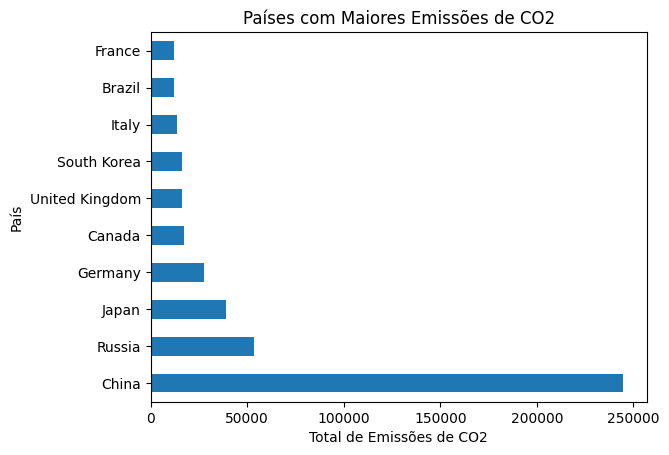

In [164]:
# Agrupa os dados por país e calcula a soma total de emissões de CO2 para cada país
top_emitters = df_merged.groupby('Country')['Total'].sum().sort_values(ascending=False)

# Seleciona os 10 primeiros países com as maiores emissões e cria um gráfico de barras horizontal
top_emitters.head(10).plot(kind='barh')

# Define os rótulos dos eixos x e y e o título do gráfico
plt.xlabel('Total de Emissões de CO2')
plt.ylabel('País')
plt.title('Países com Maiores Emissões de CO2')

# Exibe o gráfico gerado
plt.show()

# Explicação: 

Com base no gráfico apresentado, podemos concluir que os países que mais emitem CO2 são:

    China: O país asiático lidera significativamente o ranking, com uma quantidade de emissões bem superior aos demais países listados.
    Rússia: A Rússia ocupa a segunda posição, com um volume de emissões consideravelmente menor que a China, mas ainda assim expressivo.
    Japão: O Japão se posiciona em terceiro lugar, apresentando um nível de emissões inferior aos dois primeiros colocados.
    Alemanha: A Alemanha ocupa a quarta posição, seguida de perto por outros países industrializados.
    Canadá: O Canadá aparece em quinto lugar, com um volume de emissões relevante.
    Reino Unido: O Reino Unido se posiciona em sexto lugar, seguido por países como Coreia do Sul, Itália e França.

# Entre EUA e Brasil, qual emite mais CO2 nos últimos anos?

 Este código Python tem como objetivo comparar as emissões de dióxido de carbono (CO2) per capita entre os Estados Unidos e o Brasil ao longo dos anos. Ele gera um gráfico de linha que visualiza essa comparação, permitindo identificar qual país possui as maiores emissões em cada período analisado.
 Este código extrai os dados de emissões de CO2 per capita dos Estados Unidos e do Brasil de um DataFrame, cria um gráfico de linha comparando as emissões ao longo dos anos e personaliza o gráfico para facilitar a interpretação dos resultados. Através desse gráfico, é possível visualizar qual país possui as maiores emissões de CO2 per capita em cada período analisado.


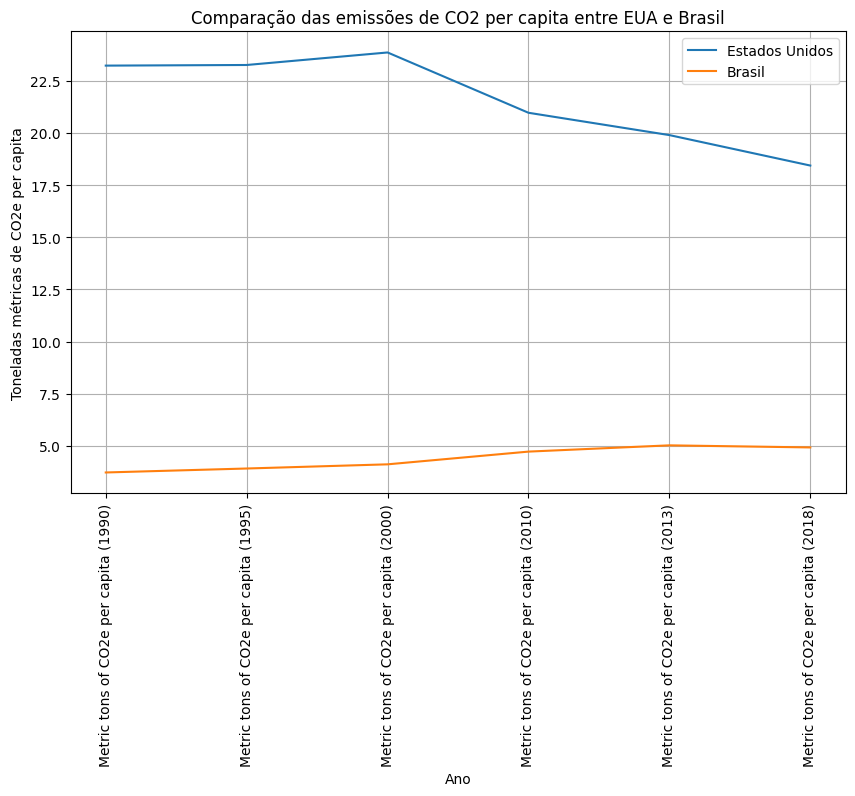

In [165]:
# Filtra os dados para obter as informações específicas dos Estados Unidos e do Brasil
df_usa = df2[df2['ISO3'] == 'USA']
df_brasil = df2[df2['ISO3'] == 'BRA']

# Lista os anos para os quais serão comparadas as emissões
anos = ['Metric tons of CO2e per capita (1990)', 
        'Metric tons of CO2e per capita (1995)',
        'Metric tons of CO2e per capita (2000)',
        'Metric tons of CO2e per capita (2010)',
        'Metric tons of CO2e per capita (2013)',
        'Metric tons of CO2e per capita (2018)',]

# Cria um gráfico de linhas com tamanho personalizado
plt.figure(figsize=(10, 6))

# Plota as linhas para os Estados Unidos e o Brasil, usando os dados de emissões por ano
plt.plot(anos, df_usa[anos].values[0], label='Estados Unidos')
plt.plot(anos, df_brasil[anos].values[0], label='Brasil')

# Define os rótulos dos eixos, o título do gráfico e a legenda
plt.xlabel('Ano')
plt.ylabel('Toneladas métricas de CO2e per capita')
plt.title('Comparação das emissões de CO2 per capita entre EUA e Brasil')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.legend()

# Adiciona uma grade ao gráfico para facilitar a leitura
plt.grid(True)

# Mostra o gráfico
plt.show()

# Explicação:

O gráfico apresentado mostra claramente que, nos últimos anos, os Estados Unidos emitem uma quantidade significativamente maior de CO2 per capita em comparação ao Brasil.
O gráfico evidencia que o modelo de produção e consumo nos Estados Unidos gera uma quantidade muito maior de emissões de gases do efeito estufa por pessoa em comparação ao Brasil. Essa diferença pode ser atribuída a diversos fatores, como a maior industrialização, o maior uso de veículos particulares e a maior dependência de fontes de energia fósseis nos Estados Unidos.
Com base no gráfico apresentado, podemos afirmar com segurança que os Estados Unidos são o maior emissor de CO2 per capita entre os dois países no período analisado. Essa informação é crucial para entender o impacto de cada país nas mudanças climáticas globais e para a formulação de políticas públicas para reduzir as emissões de gases do efeito estufa.

# De 1750 até 2021, quanto foi o aumento da emissão de CO2 a nivel Global?

Este código Python tem como objetivo visualizar a evolução das emissões globais de dióxido de carbono (CO2) ao longo do tempo, desde 1750 até 2021. Ele gera um gráfico de linha que mostra o aumento gradual das emissões ao longo desses anos.
Em suma, este código fornece uma visualização clara e concisa da evolução histórica das emissões globais de CO2, evidenciando a urgência de adotar medidas para mitigar as mudanças climáticas.

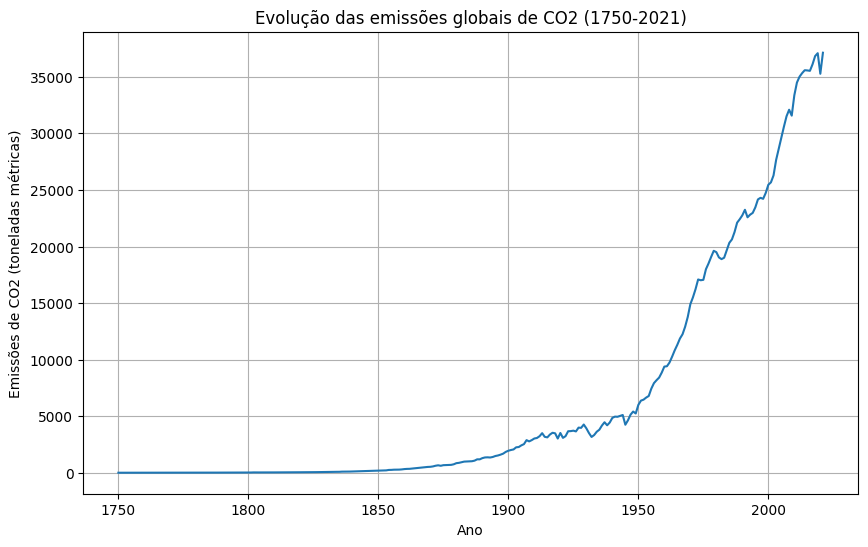

In [166]:
# Filtra os dados para obter apenas os dados globais e ordena por ano
df_global = df1[df1['Country'] == 'Global'].sort_values('Year')

# Cria um gráfico de linha com tamanho personalizado
plt.figure(figsize=(10, 6))

# Plota a linha das emissões globais ao longo dos anos
plt.plot(df_global['Year'], df_global['Total'])

# Define os rótulos dos eixos, o título do gráfico e adiciona uma grade
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 (toneladas métricas)')
plt.title('Evolução das emissões globais de CO2 (1750-2021)')
plt.grid(True)

# Mostra o gráfico
plt.show()

# Explicação

O gráfico apresentado mostra um crescimento exponencial das emissões globais de CO2 ao longo dos anos, desde 1750 até 2021. Para responder à pergunta de forma mais precisa, seria necessário ter os dados numéricos exatos das emissões em 1750 e em 2021. No entanto, podemos fazer algumas observações qualitativas com base na visualização:

    Aumento significativo: É evidente que as emissões de CO2 aumentaram drasticamente ao longo desse período, especialmente nas últimas décadas.
    Taxa de crescimento acelerada: A taxa de crescimento das emissões não foi constante. Observamos um aumento mais gradual nos primeiros séculos, seguido por um crescimento exponencial nas últimas décadas.
    Impacto da industrialização: A industrialização, que se intensificou a partir do século XIX, foi um dos principais motores do aumento das emissões de CO2, devido ao uso crescente de combustíveis fósseis.


# Dos países da OCDE, qual é o maior emissor?

Este código Python tem como objetivo identificar e visualizar o país da OCDE com a maior emissão de CO2 per capita no ano de 2018. Ele processa um DataFrame (uma tabela de dados) e gera um gráfico de barras verticais que mostra as emissões de CO2 per capita de cada país da OCDE, ordenados do maior para o menor.
O gráfico gerado por este código permite identificar rapidamente o país da OCDE com a maior emissão de CO2 per capita no ano de 2018. Essa informação é útil para entender as contribuições de cada país para as mudanças climáticas e para avaliar o progresso em relação às metas de redução de emissões.
Em suma, este código fornece uma visualização clara e concisa das emissões de CO2 per capita dos países da OCDE, permitindo uma comparação direta entre os países e facilitando a análise das tendências de emissão.

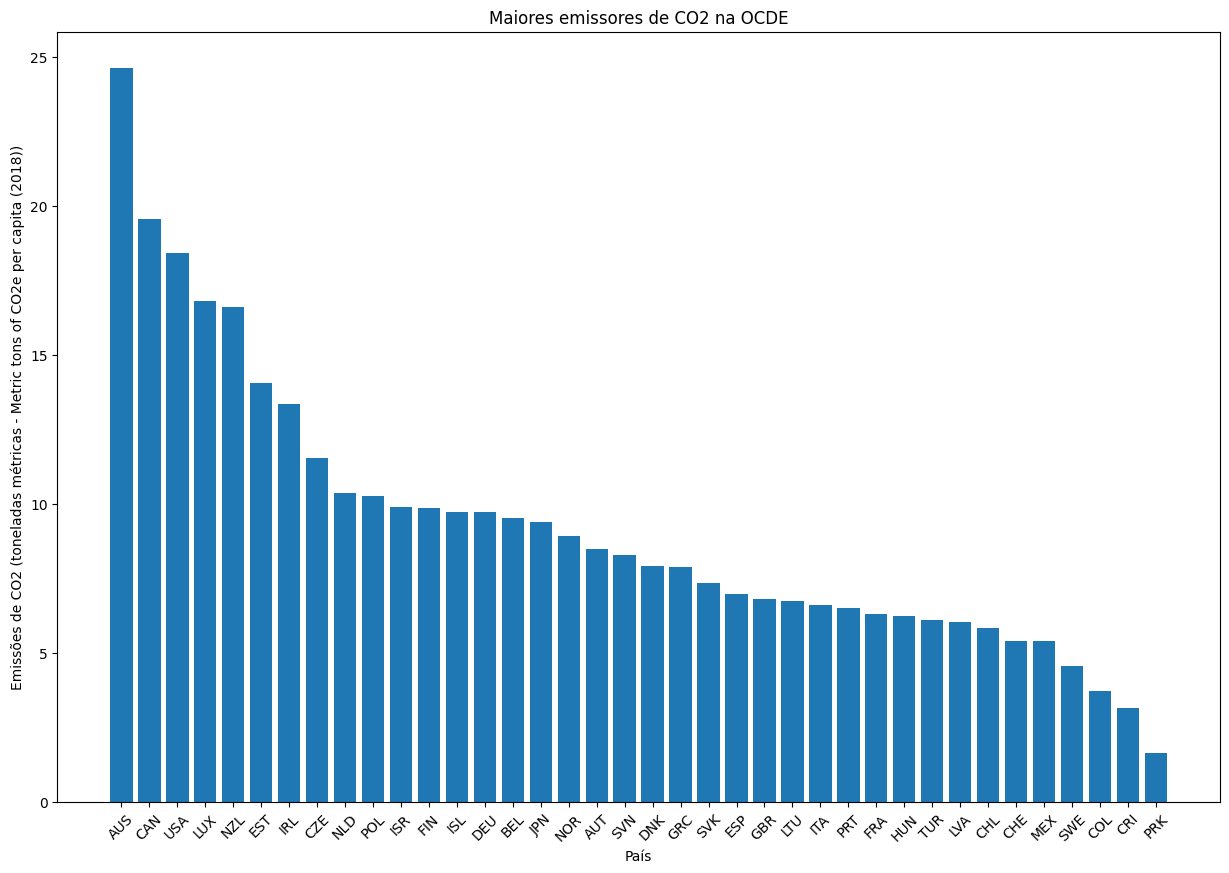

In [167]:
paises_ocde = ['DEU', 'AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 
               'PRK', 'CRI', 'DNK', 'SVK', 'SVN', 'ESP', 'USA', 
               'EST', 'FIN', 'FRA', 'GRC', 'HUN', 'IRL', 'ISL', 
               'ISR', 'ITA', 'JPN', 'LVA', 'LTU', 'LUX', 'MEX', 
               'NOR', 'NZL', 'NLD', 'POL', 'PRT', 'GBR', 'CZE', 'SWE', 'CHE', 'TUR'] # Lista de códigos de países da OCDE
df_ocde = df2[df2['ISO3'].isin(paises_ocde)]  # Filtra o DataFrame para os países da OCDE

column_list = ['Metric tons of CO2e per capita (2018)']  # Coluna com os dados de emissões

emissoes_por_pais = df_ocde.groupby('ISO3')[column_list].sum().reset_index()  # Agrupa por país e soma as emissões

for year in column_list:
  emissoes_por_pais = emissoes_por_pais.sort_values(by=year, ascending=False)  # Ordena os países pelas emissões
  plt.figure(figsize=(15, 10))  # Cria um novo gráfico
  plt.bar(emissoes_por_pais['ISO3'], emissoes_por_pais[year])  # Cria um gráfico de barras
  plt.xlabel('País')  # Define o rótulo do eixo x
  plt.ylabel(f'Emissões de CO2 (toneladas métricas - {year})')  # Define o rótulo do eixo y
  plt.title('Maiores emissores de CO2 na OCDE')  # Define o título do gráfico
  plt.xticks(rotation=45)  # Rotaciona os rótulos dos países para melhor visualização
  plt.show()

# Explicação 

Com base no gráfico fornecido, podemos concluir que a Austrália (AUS) é o país da OCDE com a maior emissão de CO2 per capita no ano de 2018.
O gráfico mostra de forma clara que a Australia possui a maior pegada de carbono por pessoa entre os países da OCDE no ano analisado. Isso significa que, em média, cada autraliano emite uma quantidade significativamente maior de CO2 em suas atividades diárias em comparação com os cidadãos de outros países da OCDE.
O gráfico demonstra que a Austrália é o maior emissor de CO2 per capita entre os países da OCDE em 2018. Essa informação é crucial para entender as contribuições de cada país para as mudanças climáticas e para direcionar esforços para a redução das emissões globais.

# Entre Brasil e o Mundo, qual foi o aumento nas emissões de CO2? 

Este código Python tem como objetivo comparar a evolução das emissões de CO2 per capita entre o Brasil e o mundo ao longo do tempo, desde 1750 até 2021. Ele gera um gráfico de linha que visualiza essa comparação, permitindo identificar qual país teve o maior aumento nas emissões e como essa evolução se compara à média global.
O gráfico gerado por este código permite comparar a evolução das emissões de CO2 per capita do Brasil com a média mundial. Isso ajuda a entender a contribuição do Brasil para as mudanças climáticas globais e a identificar se o país está emitindo mais ou menos CO2 per capita em comparação com outros países.

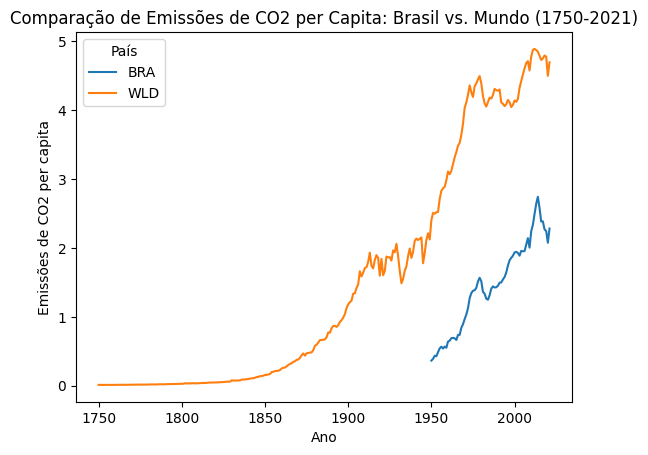

In [168]:
comparacao = ['BRA','WLD']  # Comparação entre Brasil e Mundo
df_comparacao = df1[df1['ISO 3166-1 alpha-3'].isin(comparacao)]  # Filtra os dados para os países selecionados

column_list = ['Per Capita']  # Coluna com os dados de emissões per capita

emissoes_por_pais = df_comparacao.groupby('ISO 3166-1 alpha-3')[column_list].sum().reset_index()  # Agrupa por país e soma as emissões

sns.lineplot(x='Year', y='Per Capita', hue='ISO 3166-1 alpha-3', data=df_comparacao)  # Cria um gráfico de linha

plt.xlabel('Ano')  # Define o rótulo do eixo x
plt.ylabel('Emissões de CO2 per capita')  # Define o rótulo do eixo y
plt.title('Comparação de Emissões de CO2 per Capita: Brasil vs. Mundo (1750-2021)')  # Define o título do gráfico
plt.legend(title='País')  # Adiciona uma legenda

plt.show()

# Explicação

Com base no gráfico fornecido, podemos observar que tanto o Brasil quanto o mundo como um todo experimentaram um aumento significativo nas emissões de CO2 per capita ao longo do período de 1750 a 2021. No entanto, a taxa de crescimento e os níveis absolutos de emissão diferem entre os dois.

Conclusões:

    Aumento significativo em ambos: Tanto o Brasil quanto o mundo como um todo experimentaram um aumento substancial nas emissões de CO2 per capita ao longo do período analisado.
    Crescimento acelerado do Brasil: A partir de meados do século XX, o Brasil apresentou uma taxa de crescimento das emissões mais elevada do que a média mundial.
    Contribuição brasileira: O Brasil passou a ter uma contribuição cada vez maior para as emissões globais de CO2, especialmente nas últimas décadas.

# Qual é a tendência na emissão per capita no Brasil nos próximos 5 anos? 

Este código Python realiza uma análise de regressão linear para prever as emissões de CO2 per capita no Brasil nos próximos 5 anos, com base nos dados históricos de 1950 a 2021. Ele utiliza um modelo de regressão linear simples para estabelecer uma relação entre o ano e as emissões de CO2 e, em seguida, utiliza esse modelo para fazer previsões para os anos subsequentes.
Este código fornece uma análise inicial da tendência das emissões de CO2 per capita no Brasil utilizando um modelo de regressão linear simples. No entanto, é importante ressaltar que este é um modelo simplificado e que outros fatores podem influenciar as emissões de CO2 no futuro. Para obter previsões mais precisas, seria necessário utilizar modelos mais complexos e considerar um conjunto mais amplo de variáveis.

RMSE: 0.1966254261503581
MAE: 0.1464119602844217
R²: 0.3827296388621415


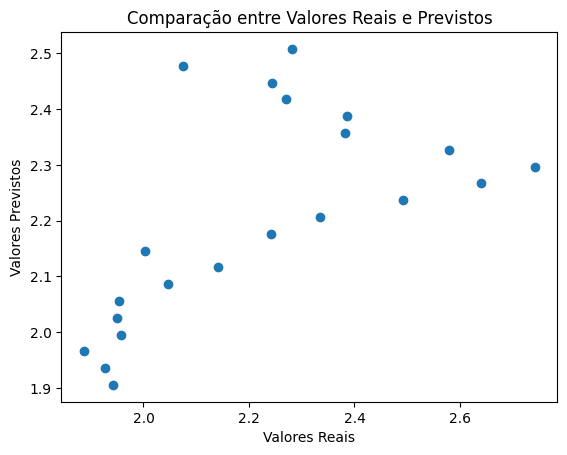

In [169]:
# Define o país a ser analisado
brasil = ['BRA']
df_brasil = df1[df1['ISO 3166-1 alpha-3'].isin(brasil)]

# Separa os dados em treino e teste
ano_inicial_treino = 1950
ano_final_treino = 2000
ano_inicial_teste = 2001
ano_final_teste = 2021

train_df = df_brasil[(df_brasil['Year'] >= ano_inicial_treino) & (df_brasil['Year'] <= ano_final_treino)]
test_df = df_brasil[(df_brasil['Year'] >= ano_inicial_teste) & (df_brasil['Year'] <= ano_final_teste)]

# Define os dados para o modelo
X_train = train_df[['Year']]  # Matriz de features (ano) para treino
y_train = train_df['Per Capita']  # Vetor de target (emissões per capita) para treino
X_test = test_df[['Year']]  # Matriz de features (ano) para teste
y_test = test_df['Per Capita']  # Vetor de target (emissões per capita) para teste

# Cria e treina o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Realiza a previsão para os dados de teste
y_pred = model.predict(X_test)

# Calcula os indicadores de desempenho
mse = mean_squared_error(y_test, y_pred)  # Erro Quadrático Médio
rmse = np.sqrt(mse)  # Raiz Quadrada do Erro Quadrático Médio
mae = mean_absolute_error(y_test, y_pred)  # Erro Absoluto Médio
r2 = r2_score(y_test, y_pred)  # R² (coeficiente de determinação)

# Imprime os indicadores de desempenho
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

# Visualiza a comparação entre valores reais e previstos
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos')
plt.show()

# Explicação

O gráfico apresentado, que compara os valores reais de emissão de CO2 per capita com os valores previstos pelo modelo de regressão linear, oferece uma visualização da precisão do modelo. Os pontos no gráfico representam pares de valores: o valor real (eixo x) e o valor previsto pelo modelo (eixo y).

    RMSE (Root Mean Squared Error): Indica o desvio médio quadrático, ou seja, a diferença média entre os valores previstos e os valores reais. Um valor baixo de RMSE sugere que o modelo se ajusta bem aos dados.
    MAE (Mean Absolute Error): Indica o erro absoluto médio, ou seja, a diferença absoluta média entre os valores previstos e os valores reais. Assim como o RMSE, um valor baixo de MAE indica um bom ajuste do modelo.
    R²: Representa o coeficiente de determinação, que indica a proporção da variabilidade dos dados que é explicada pelo modelo. Um valor de R² próximo de 1 indica um bom ajuste do modelo aos dados.

Com base nos resultados apresentados, podemos inferir algumas tendências para as emissões de CO2 per capita no Brasil nos próximos 5 anos:

    Continuação da tendência de crescimento: O modelo de regressão linear sugere que a tendência de crescimento das emissões de CO2 per capita no Brasil pode continuar nos próximos anos. No entanto, a precisão dessa previsão é limitada pelos fatores mencionados anteriormente.
    Incertezas: Os valores de RMSE e R² indicam que o modelo apresenta um nível razoável de incerteza. Isso significa que a previsão pode não ser totalmente precisa e que outros fatores podem influenciar significativamente as emissões futuras.
    Necessidade de modelos mais complexos: Para obter previsões mais precisas, seria necessário utilizar modelos mais complexos que considerassem um maior número de variáveis e interações entre elas.

# Como as emissões de CO2 estão relacionadas ao PIB per capita no Brasil?

O código apresentado busca estabelecer uma relação entre as emissões de CO2 per capita no Brasil e o PIB (Produto Interno Bruto) do país ao longo dos anos, a partir de 1990. O código apresentado fornece uma visualização inicial da relação entre o PIB e as emissões de CO2 no Brasil. No entanto, para uma análise mais completa e robusta, é necessário aprofundar a análise, considerando outros fatores e utilizando modelos mais sofisticados.

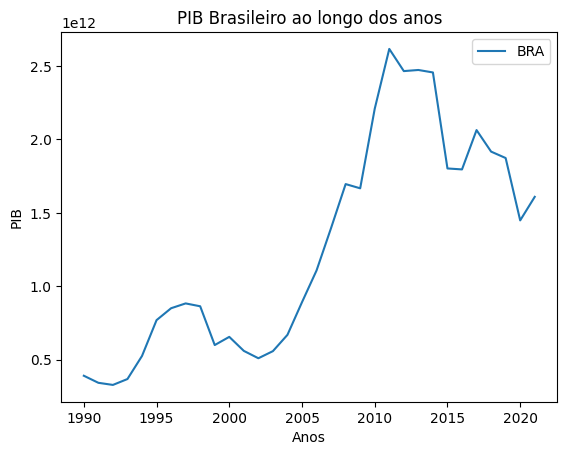

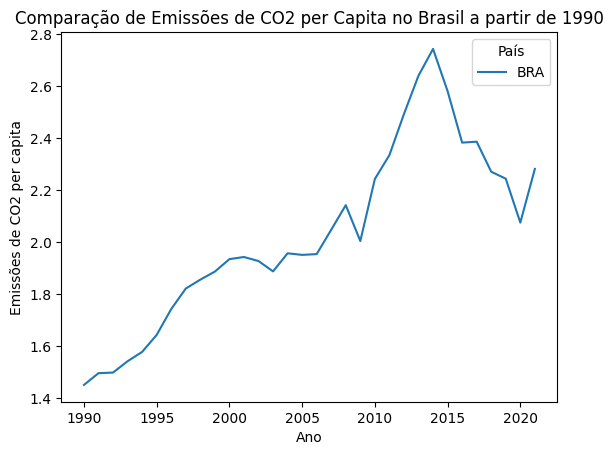

In [170]:
# Filtra os dados do DataFrame df1_limpo para obter apenas as informações do Brasil
# usando o código ISO 3166-1 alpha-3
df1_brasil = df1_limpo.query("`ISO 3166-1 alpha-3` == 'BRA'")

# Filtra os dados do DataFrame df3 para obter apenas as informações do Brasil
# usando o código do país
df3_brasil = df3.query("country_code == 'BRA'")

# Junta os DataFrames df1_brasil e df3_brasil com base no ano
# Preenche os valores ausentes com zero
df_completo = pd.merge(df1_brasil, df3_brasil, on='Year').fillna(0)

# Filtra os dados do DataFrame df1 para obter apenas as informações do Brasil e a partir de 1990
df_brasil = df1[df1['ISO 3166-1 alpha-3'].isin(brasil)]
df_brasil = df_brasil[df_brasil['Year'] >= 1990]

# Cria um gráfico de linha para visualizar a evolução do PIB brasileiro ao longo dos anos
# A coluna 'total_gdp' representa o PIB e 'country_code' é usado para diferenciar os países (neste caso, apenas o Brasil)
sns.lineplot(x='Year', y='total_gdp', hue='country_code', data=df_completo)

# Personaliza o gráfico com rótulos e título
plt.xlabel('Anos')
plt.ylabel('PIB')
plt.title('PIB Brasileiro ao longo dos anos')
plt.legend()
plt.show()

# Cria um gráfico de linha para visualizar a evolução das emissões de CO2 per capita no Brasil a partir de 1990
# A coluna 'Per Capita' representa as emissões de CO2 por pessoa
sns.lineplot(x='Year', y='Per Capita', hue='ISO 3166-1 alpha-3', data=df_brasil)

# Personaliza o gráfico com rótulos e título
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 per capita')
plt.title('Comparação de Emissões de CO2 per Capita no Brasil a partir de 1990')
plt.legend(title='País')

plt.show()

# Explicação

Ao realizar uma análise mais completa, é possível obter insights valiosos para a formulação de políticas públicas que promovam o desenvolvimento econômico de forma sustentável e contribuam para a mitigação das mudanças climáticas.
Ao comparar este gráfico com o gráfico do PIB, é possível identificar se existe uma correlação entre o crescimento econômico e as emissões de CO2. Se houver uma correlação positiva forte, isso indicaria que o crescimento econômico está diretamente ligado ao aumento das emissões. No entanto, se a correlação for fraca ou negativa, isso pode indicar que o Brasil está conseguindo desacoplar o crescimento econômico das emissões de CO2.

# Qual foi a energia mais poluente usado no Brasil?

O código apresentado visa analisar o consumo de diferentes fontes de energia no Brasil ao longo dos anos, com foco em identificar a principal fonte de energia utilizada no país. O código fornece uma visualização geral do consumo de diferentes fontes de energia no Brasil ao longo do tempo. No entanto, para responder à pergunta sobre a energia mais poluente, é necessário realizar uma análise mais aprofundada, considerando dados sobre emissões e outros fatores relevantes.

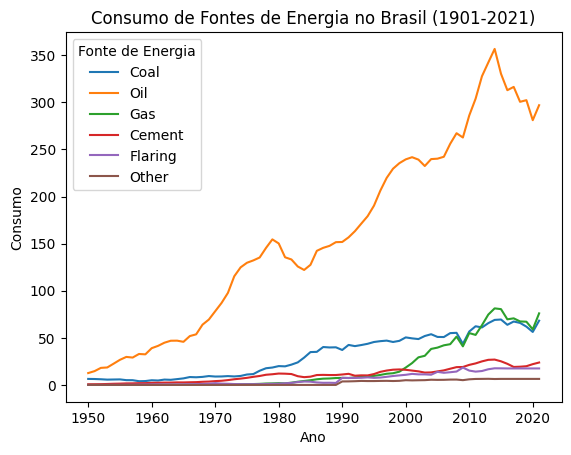

In [171]:
# Filter data for Brazil and years 1950 onwards
df_brasil = df1[(df1['ISO 3166-1 alpha-3'] == 'BRA') & (df1['Year'] >= 1950)]

# Group data by year and sum consumption for each energy source
df_agrupado = df_brasil.groupby('Year')[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']].sum().reset_index()

# Convert year column to numeric for plotting purposes
df_agrupado['Year'] = pd.to_numeric(df_agrupado['Year'])

# Reshape data for seaborn lineplot
df_junto = df_agrupado.melt(id_vars='Year', var_name='Energy Source', value_name='Consumption')

# Create lineplot to visualize consumption by energy source over time
sns.lineplot(data=df_junto, x='Year', y='Consumption', hue='Energy Source')

# Add title, labels, and legend for better understanding
plt.title('Consumo de Fontes de Energia no Brasil (1901-2021)')
plt.xlabel('Ano')
plt.ylabel('Consumo')
plt.legend(title='Fonte de Energia')

plt.show()

# Explicação

Analisando as Fontes de Energia do Gráfico:

    Carvão: Historicamente, o carvão é considerado uma das fontes de energia mais poluentes, liberando grandes quantidades de CO2 e outros poluentes durante a combustão. No entanto, seu uso no Brasil tem sido relativamente limitado.
    Petróleo: O petróleo e seus derivados são amplamente utilizados no Brasil, tanto para geração de energia elétrica quanto para transporte. A queima de combustíveis derivados do petróleo libera grandes quantidades de CO2 e outros poluentes.
    Gás Natural: O gás natural é considerado uma fonte de energia menos poluente que o carvão e o petróleo, pois libera menos CO2 por unidade de energia produzida. No entanto, sua queima ainda libera gases de efeito estufa.
    Cimento: A produção de cimento é um processo industrial que emite grandes quantidades de CO2, principalmente devido à calcinação do calcário.
    Flaring: O flaring é a queima de gás natural em poços de petróleo, o que libera grandes quantidades de metano, um potente gás do efeito estufa.

Conclusão:

Com base nas informações disponíveis e no conhecimento geral sobre as fontes de energia, podemos inferir que o petróleo e seus derivados, assim como o carvão (em menor escala), são as fontes de energia que historicamente mais contribuíram para a poluição no Brasil. No entanto, para uma resposta mais precisa, seria necessário analisar dados mais detalhados sobre as emissões de gases do efeito estufa por fonte de energia no Brasil.

# Referencias

<p>pandas (pd): https://pandas.pydata.org/docs/</p>
<p>matplotlib.pyplot (plt): https://matplotlib.org/</p>
<p>seaborn (sns): https://seaborn.pydata.org/</p>
<p>numpy (np): https://numpy.org//p>
<p>plotly.express (px): https://plotly.com/python/plotly-express/</p>
<p>Prophet : https://facebook.github.io/prophet/</p>
<p>scikit-learn (inclui train_test_split, MinMaxScaler, LinearRegression, DecisionTreeClassifier, accuracy_score, mean_squared_error, mean_absolute_error, r2_score): https://scikit-learn.org/stable/</p>
<p>Dataframe (countries_gdp_hist.csv): https://www.kaggle.com/datasets/fredericksalazar/pib-gdp-global-by-countries-since-1960-to-2021/data?select=countries_gdp_hist.csv</p>
<p>Dataframe (production-based-co2-emissions.csv): https://www.kaggle.com/datasets/iamsouravbanerjee/production-based-co2-emissions/data</p>
<p>Dataframe (GCB2022v27_MtCO2_flat.csv): https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022?select=GCB2022v27_MtCO2_flat.csv</p>